In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('retail_sales_dataset.csv')

# Check for missing values
print("Missing values by column:\n")
print(df.isnull().sum())

# Check for duplicate rows
print("\nTotal duplicate rows:", df.duplicated().sum())

# Optional: Check for duplicates in Transaction ID (if each should be unique)
print("\nDuplicate Transaction IDs:")
print(df[df.duplicated(subset='Transaction ID')])

Missing values by column:

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Total duplicate rows: 0

Duplicate Transaction IDs:
Empty DataFrame
Columns: [Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, Total Amount]
Index: []


In [4]:
missing_values = df.isnull().sum()
print("Missing values by column:\n", missing_values)

Missing values by column:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [5]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [6]:
# Gender distribution
print(df['Gender'].value_counts(normalize=True) * 100)

# Age summary
print("Average age:", df['Age'].mean())
print(df['Age'].describe())

# Age segmentation
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 60, 100], 
                         labels=['18–25', '26–35', '36–45', '46–60', '60+'])
print(df['Age_Group'].value_counts())

Gender
Female    51.0
Male      49.0
Name: proportion, dtype: float64
Average age: 41.392
count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: Age, dtype: float64
Age_Group
46–60    331
26–35    205
36–45    202
18–25    169
60+       93
Name: count, dtype: int64


In [7]:
gender_category = df.groupby(['Gender', 'Product Category']).size().unstack()
gender_category_percent = gender_category.div(gender_category.sum(axis=1), axis=0)
print(gender_category_percent.round(2))

Product Category  Beauty  Clothing  Electronics
Gender                                         
Female              0.33      0.34         0.33
Male                0.29      0.36         0.35


In [8]:
age_behavior = df.groupby('Age_Group')[['Quantity', 'Total Amount']].mean()
print(age_behavior)

           Quantity  Total Amount
Age_Group                        
18–25      2.437870    500.295858
26–35      2.634146    480.390244
36–45      2.504950    454.801980
46–60      2.510574    446.752266
60+        2.419355    357.258065


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
categories = df['Product Category'].unique()
print("Product Categories:", categories)

Product Categories: ['Beauty' 'Clothing' 'Electronics']


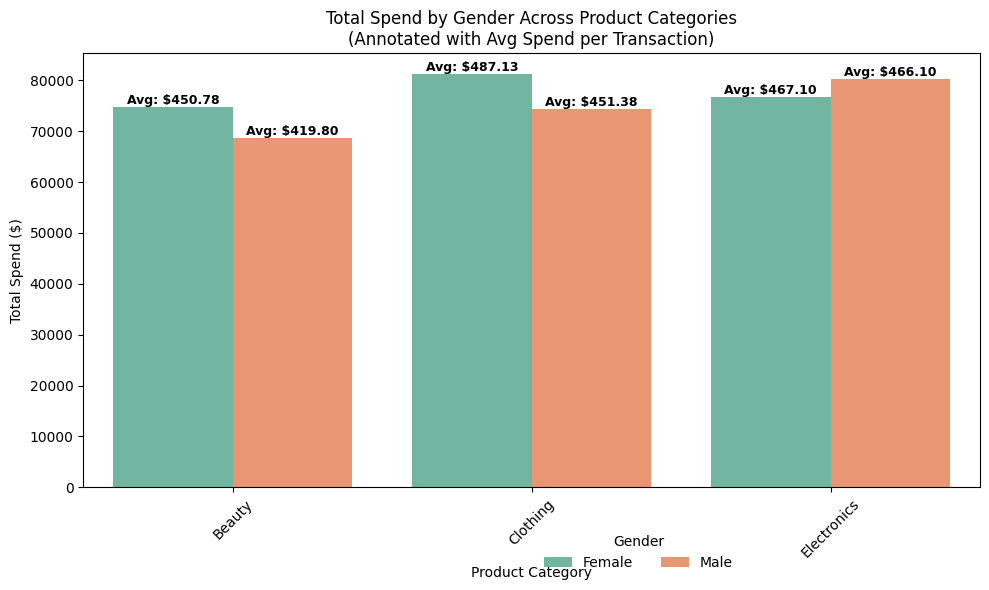

In [25]:
category_gender_spending = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()
avg_spending = df.groupby(['Product Category','Gender'])['Total Amount'].mean().reset_index()

merged_df = pd.merge(category_gender_spending, avg_spending,
                     on=['Product Category', 'Gender'],
                     suffixes=('_Total', '_Avg'))

plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=merged_df,
                      x='Product Category',
                      y='Total Amount_Total',
                      hue='Gender',
                      palette='Set2')

for i, bar in enumerate(barplot.patches):
    avg = merged_df.loc[i, 'Total Amount_Avg']
    height = bar.get_height()

    barplot.text(bar.get_x() + bar.get_width() / 2,
                 height + 1,
                 f'Avg: ${avg:,.2f}',
                 ha='center', va='bottom',
                 fontsize=9, color='black', fontweight='bold')
    
plt.legend(title='Gender', loc='center left',
           bbox_to_anchor=(0.5, -0.15),
           ncol=2, frameon=False)


plt.title('Total Spend by Gender Across Product Categories\n(Annotated with Avg Spend per Transaction)')
plt.xlabel('Product Category')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





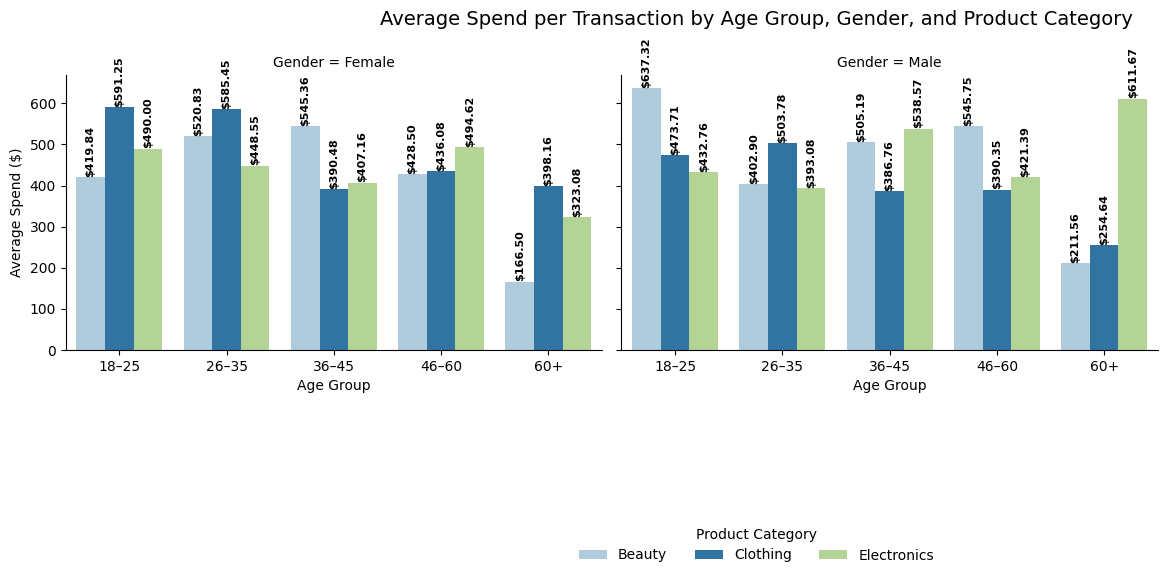

In [30]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 60, 100],
                         labels=['18–25', '26–35', '36–45', '46–60', '60+'])

# Group by Age Group, Gender, and Product Category
grouped = df.groupby(['Age Group', 'Gender', 'Product Category'])['Total Amount'].mean().reset_index()

# Create the FacetGrid
g = sns.FacetGrid(data=grouped, col='Gender', height=5, aspect=1.2, sharey=True)

# Map the barplot onto each gender panel
g.map_dataframe(sns.barplot,
                x='Age Group',
                y='Total Amount',
                hue='Product Category',
                palette='Paired')

# Add vertical annotations to each bar
for ax in g.axes.flatten():
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width() / 2,
                    height + 0.5,
                    f'${height:,.2f}',
                    ha='center', va='bottom',
                    rotation=90,
                    fontsize=8, color='black', fontweight='bold')

# Adjust legend and layout
g.add_legend(title='Product Category',
             bbox_to_anchor=(0.5, -0.15),
             loc='lower center',
             ncol=3,
             frameon=False)

g.set_axis_labels('Age Group', 'Average Spend ($)')
g.fig.suptitle('Average Spend per Transaction by Age Group, Gender, and Product Category', fontsize=14)
plt.subplots_adjust(top=0.85, bottom=0.3)
plt.show()



In [31]:
# Count how many transactions each customer made
repeat_check = df.groupby('Customer ID')['Transaction ID'].nunique().reset_index()
repeat_check.rename(columns={'Transaction ID': 'Transaction Count'}, inplace=True)

# See if anyone made more than one purchase
print(repeat_check.sort_values(by='Transaction Count', ascending=False).head())


    Customer ID  Transaction Count
0       CUST001                  1
671     CUST671                  1
658     CUST658                  1
659     CUST659                  1
660     CUST660                  1


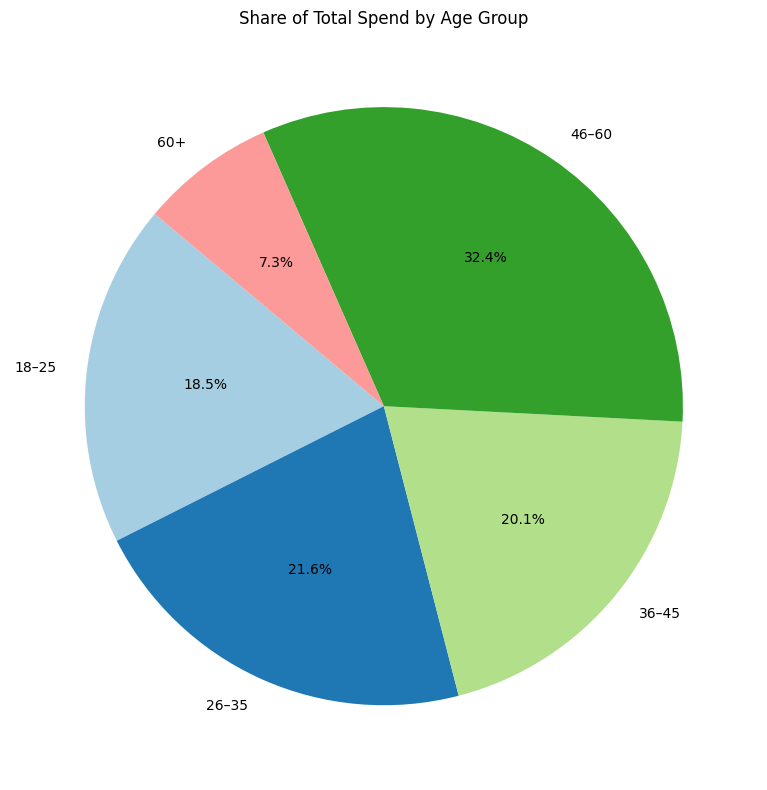

In [36]:
# Define age groups
df['Age Group'] = pd.cut(df['Age'], bins=[0, 25, 35, 45, 60, 100],
                         labels=['18–25', '26–35', '36–45', '46–60', '60+'])

# Aggregate total spend by age group
age_spend_pie = df.groupby('Age Group')['Total Amount'].sum().reset_index()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_spend_pie['Total Amount'],
        labels=age_spend_pie['Age Group'],
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors)

plt.title('Share of Total Spend by Age Group')
plt.tight_layout()
plt.show()



